In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### **Dataset**

In [2]:
!wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip

--2024-10-14 21:05:24--  https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: 'bank+marketing.zip.1'

     0K .......... .......... .......... .......... .......... 82.9K
    50K .......... .......... .......... .......... ..........  146K
   100K .......... .......... .......... .......... ..........  153K
   150K .......... .......... .......... .......... .......... 4.82M
   200K .......... .......... .......... .......... ..........  167K
   250K .......... .......... .......... .......... ..........  171K
   300K .......... .......... .......... .......... ..........  167K
   350K .......... .......... .......... .......... ..........  163K
   400K .......... .......... .......... .......... .......... 16.3M
   450K .......... ........

### **Preparing the dataset**

In [3]:
df = pd.read_csv('bank-full.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
features = ['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact', 'day',
             'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

df = df[features]
df.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   contact    45211 non-null  object
 7   day        45211 non-null  int64 
 8   month      45211 non-null  object
 9   duration   45211 non-null  int64 
 10  campaign   45211 non-null  int64 
 11  pdays      45211 non-null  int64 
 12  previous   45211 non-null  int64 
 13  poutcome   45211 non-null  object
 14  y          45211 non-null  object
dtypes: int64(7), object(8)
memory usage: 5.2+ MB


In [6]:
# Check if the missing values are presented in the features.
df.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### **Question 1**

What is the most frequent observation (mode) for the column education?

In [7]:
mode_education = df['education'].mode()[0]
print(f"The most frequent observation for the column education: {mode_education}")

The most frequent observation for the column education: secondary


### **Question 2**

Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features.

What are the two features that have the biggest correlation?

In [8]:
numerical_features = [*df.select_dtypes(include='number').columns]

corr_matrix = df[numerical_features].corr().round(2)
corr_matrix

,age,balance,day,duration,campaign,pdays,previous
age,1.00,0.10,-0.01,-0.00,0.00,-0.02,0.00
balance,0.10,1.00,0.00,0.02,-0.01,0.00,0.02
day,-0.01,0.00,1.00,-0.03,0.16,-0.09,-0.05
duration,-0.00,0.02,-0.03,1.00,-0.08,-0.00,0.00
campaign,0.00,-0.01,0.16,-0.08,1.00,-0.09,-0.03
pdays,-0.02,0.00,-0.09,-0.00,-0.09,1.00,0.45
previous,0.00,0.02,-0.05,0.00,-0.03,0.45,1.00


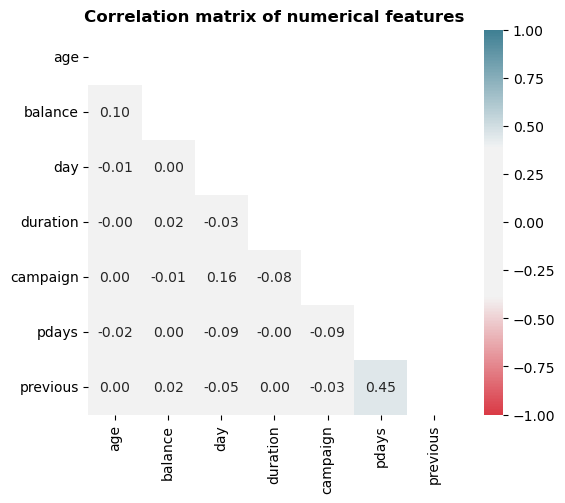

In [9]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True, sep=100)

# Create a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=cmap, vmin=-1, vmax=1, center=0, mask=mask)
plt.title('Correlation matrix of numerical features', fontweight='bold')

plt.show()

In [10]:
print("The correlation matrix shows that pdays and previous are the two features that have the biggest correlation")

The correlation matrix shows that pdays and previous are the two features that have the biggest correlation


### **Target Enconding**

- Now we want to encode the y variable.
- Let's replace the values yes/no with 1/0.

In [11]:
df['y'] = (df['y'] == 'yes').astype(int)

### **Split the data**

- Split your data in train/val/test sets with 60%/20%/20% distribution.
- Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
- Make sure that the target value y is not in your dataframe.

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

print(f"Train distribution: {len(df_train)}")
print(f"Validation distribution: {len(df_val)}")
print(f"Test distribution: {len(df_test)}")
print(f"Total distribution: {len(df)}")

Train distribution: 27126
Validation distribution: 9042
Test distribution: 9043
Total distribution: 45211


In [14]:
# reset the index of datasets
df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

In [15]:
y_train = df_train['y'].values
y_val = df_val['y'].values
y_test = df_test['y'].values

In [16]:
df_train = df_train.drop(columns='y')
df_val = df_val.drop(columns='y')
df_test = df_test.drop(columns='y')

### **Question 3**

- Calculate the mutual information score between y and other categorical variables in the dataset. Use the training set only.
- Round the scores to 2 decimals using round(score, 2).

Which of these variables has the biggest mutual information score?

In [17]:
from sklearn.metrics import mutual_info_score

In [18]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, y_train)

In [19]:
categorical_features = [*df_train.select_dtypes(include='object').columns]

mi = df_train[categorical_features].apply(mutual_info_churn_score).round(3)
mi.sort_values(ascending=False)

poutcome     0.030
month        0.025
contact      0.013
housing      0.010
job          0.007
education    0.003
marital      0.002
dtype: float64

In [20]:
biggest_mi = mi[mi.max() == mi.values].index[0]

print(f"The biggest mutual information score: {biggest_mi}")

The biggest mutual information score: poutcome


### **Question 4**

- Now let's train a logistic regression.
- Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
- Fit the model on the training dataset.
- To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
- model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
- Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

In [22]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Combine all datasets (train, validation, test)
combined_data = pd.concat([df_train, df_val, df_test], axis=0)

# Fit the OneHotEncoder on the combined dataset
ohe.fit(combined_data[categorical_features].values)

# Transform each dataset using the fitted encoder
ohe_train = ohe.transform(df_train[categorical_features].values)
ohe_val = ohe.transform(df_val[categorical_features].values)
ohe_test = ohe.transform(df_test[categorical_features].values)

# Stack the categorical columns with the numerical columns
X_train = np.column_stack([ohe_train, df_train[numerical_features].values])
X_val = np.column_stack([ohe_val, df_val[numerical_features].values])
X_test = np.column_stack([ohe_test, df_test[numerical_features].values])

In [23]:
X_train.shape, X_val.shape, X_test.shape

((27126, 47), (9042, 47), (9043, 47))

In [24]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [25]:
y_predict = model.predict(X_val)

df_pred = pd.DataFrame()
df_pred['prediction'] = y_predict
df_pred['actual'] = y_val
df_pred['correct'] = df_pred['prediction'] == df_pred['actual']
df_pred.head()

,prediction,actual,correct
0,0,0,True
1,0,0,True
2,0,1,False
3,0,0,True
4,0,1,False


In [26]:
# calculate the accuracy
accuracy = df_pred['correct'].mean().round(2)
print(f"The accuracy of the model on validation dataset: {accuracy}")

The accuracy of the model on validation dataset: 0.9


### **Question 5**

- Let's find the least useful feature using the feature elimination technique.
- Train a model with all these features (using the same parameters as in Q4).
- Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
- For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

Which of following feature has the smallest difference?

In [27]:
features = ['age', 'balance', 'marital', 'previous']
scores = {}

score_initial = accuracy

for f in features:
    # Copy the original dataframes to avoid altering them
    df_train_copy = df_train.copy()
    df_val_copy = df_val.copy()

    # Create a copy of numerical_columns and remove the current feature if it exists in the copy
    numerical_features_copy = numerical_features.copy()
    if f in numerical_features_copy:
        numerical_features_copy.remove(f)

    # Stack the categorical columns with the remaining numerical columns
    X_train = np.column_stack([ohe_train, df_train_copy[numerical_features_copy].values])
    X_val = np.column_stack([ohe_val, df_val_copy[numerical_features_copy].values])

    # Fit the logistic regression model without the current feature
    model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    # Use the model to predict the validation dataset
    y_pred_val = model.predict_proba(X_val)[:, 1]
    churn_decision = (y_pred_val >= 0.5)

    # Calculate the accuracy for the model without the current feature
    score = (churn_decision == y_val).mean()

    # Calculate the difference in accuracy
    score_difference = score_initial - score

    # Store the score difference in the dictionary
    scores[f] = score_difference

# Print the score differences for each feature
for feature, score_diff in scores.items():
    print(f"Feature: {feature}, Accuracy Difference: {score_diff}")

Feature: age, Accuracy Difference: -0.0009068790090687173
Feature: balance, Accuracy Difference: -0.001128069011280708
Feature: marital, Accuracy Difference: -0.0003539040035389629
Feature: previous, Accuracy Difference: -0.000796284007962833


In [31]:
minimum_diff = min(scores, key=scores.get)
print(f"The feature that has the smallest difference: {minimum_diff}")

The feature that has the smallest difference: balance


### **Question 6**

- Now let's train a regularized logistic regression.
- Let's try the following values of the parameter C: [0.01, 0.1, 1, 10, 100].
- Train models using all the features as in Q4.
- Calculate the accuracy on the validation dataset and round it to 3 decimal digits.

Which of these C leads to the best accuracy on the validation set?

In [32]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Combine all datasets (train, validation, test)
combined_data = pd.concat([df_train, df_val, df_test], axis=0)

# Fit the OneHotEncoder on the combined dataset
ohe.fit(combined_data[categorical_features].values)

# Transform each dataset using the fitted encoder
ohe_train = ohe.transform(df_train[categorical_features].values)
ohe_val = ohe.transform(df_val[categorical_features].values)
ohe_test = ohe.transform(df_test[categorical_features].values)

# Stack the categorical columns with the numerical columns
X_train = np.column_stack([ohe_train, df_train[numerical_features].values])
X_val = np.column_stack([ohe_val, df_val[numerical_features].values])
X_test = np.column_stack([ohe_test, df_test[numerical_features].values])

In [ ]:
C_values = [0.01, 0.1, 1, 10, 100]
accuracy_scores = {}

for c in C_values:
    model = LogisticRegression(solver='liblinear', C=c, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)

    accuracy = (y_pred == y_val).mean().round(3)

    accuracy_scores[c] = accuracy

    print(f"Accuracy with C: {c} is {accuracy}")

Accuracy with C: 0.01 is 0.898
Accuracy with C: 0.1 is 0.901
Accuracy with C: 1 is 0.901
Accuracy with C: 10 is 0.9
Accuracy with C: 100 is 0.901


In [34]:
best_accuracy = max(accuracy_scores, key=accuracy_scores.get)
print(f"The C value that has the best accuracy: {best_accuracy}")

The C value that has the best accuracy: 0.1
